# Part 2, Q2a, What are the best times and days to minimise delays each year?

## Reading in relevant files 

In [10]:
import pandas as pd

df_2004 = pd.read_csv ('2004.csv.bz2')
df_2005 = pd.read_csv ('2005.csv.bz2')
df_2006 = pd.read_csv ('2006.csv.bz2')
df_2007 = pd.read_csv ('2007.csv.bz2')
df_2008 = pd.read_csv ('2008.csv.bz2')

airports = pd.read_csv('airports.csv')

carriers = pd.read_csv('carriers.csv')

planedata = pd.read_csv('plane-data.csv')

variable_descriptions = pd.read_csv('variable-descriptions.csv')

## Understanding the data
### Columns present in each dataframe 

In [15]:
df_2004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129270 entries, 0 to 7129269
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     int64  
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [19]:
variable_descriptions 

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


In [21]:
df_2004

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7,11,0,NaN,0,0,0,0,0,0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16,16,0,NaN,0,0,0,0,0,0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4,15,0,NaN,0,0,0,0,0,0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4,10,0,NaN,0,0,0,0,0,0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3,13,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129265,2004,12,16,4,1645.0,1639,1715.0,1716,DL,1138,...,4,13,0,NaN,0,0,0,0,0,0
7129266,2004,12,16,4,726.0,720,1238.0,1239,DL,1139,...,10,11,0,NaN,0,0,0,0,0,0
7129267,2004,12,16,4,1336.0,1330,1507.0,1504,DL,1139,...,5,10,0,NaN,0,0,0,0,0,0
7129268,2004,12,16,4,538.0,540,720.0,723,DL,1140,...,7,12,0,NaN,0,0,0,0,0,0


## Creating a new variable - Total delay:'CarrierDelay'+'WeatherDelay','NASDelay'+'SecurityDelay'+'LateAircraftDelay'

In [11]:
import pandas as pd
import numpy as np

# New column, returning dataframe, Nan = 0 is treated as skipping
df_2004['TDelay_04']=(df_2004[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
df_2005['TDelay_05']=(df_2005[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
df_2006['TDelay_06']=(df_2006[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
df_2007['TDelay_07']=(df_2007[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
df_2008['TDelay_08']=(df_2008[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))


# Best times to minimise delay

In [74]:
# counting number of uniquely scheduled flight times
len(df_2004['CRSDepTime'].unique())

1182

In [ ]:
# How are flights scheduled in a week 
import matplotlib as plt
import seaborn as sns 

# sns.lineplot(data = df_2004, x = 'DayOfWeek', y = 'CRSDepTime')

## Average delay - In terms of days of scheduled departures

In [77]:
avg_timedelay_2004 = df_2004.groupby('CRSDepTime')['TDelay_04'].mean()
avg_timedelay_2005 = df_2005.groupby('CRSDepTime')['TDelay_05'].mean()
avg_timedelay_2006 = df_2006.groupby('CRSDepTime')['TDelay_06'].mean()
avg_timedelay_2007 = df_2007.groupby('CRSDepTime')['TDelay_07'].mean()
avg_timedelay_2008 = df_2008.groupby('CRSDepTime')['TDelay_08'].mean()

# Best days to minimise delay

/var/folders/fy/14hxgrm51svd16v3p0d6pz5h0000gn/T/ipykernel_1364/2474492358.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


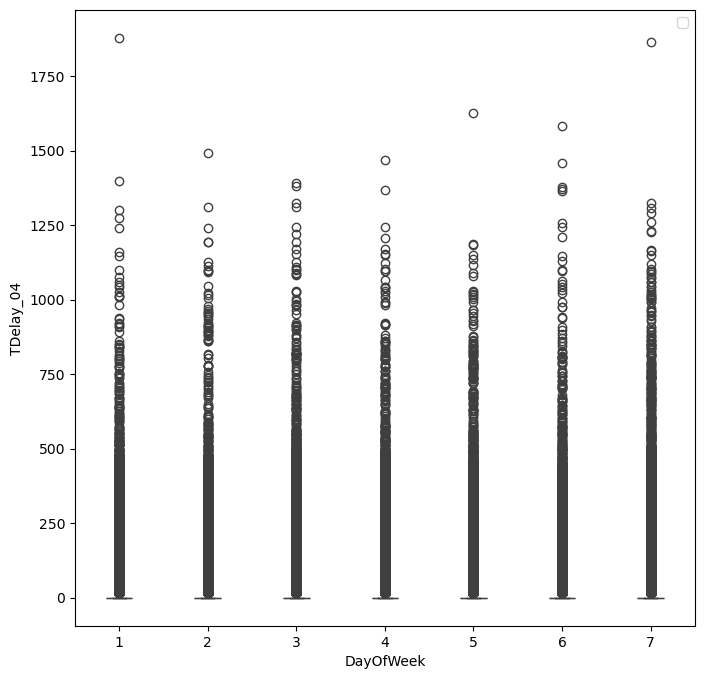

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, ax = plt.subplots(figsize = (8, 8))
sns.boxplot(data = df_2004, x = 'DayOfWeek', y = 'TDelay_04', width = 0.3, boxprops = dict(alpha=0.6))
plt.legend()
#plt.savefig("")

## Average delay - In terms of days of the week

In [20]:
# using groupby and .mean()
avg_dailydelay_2004 = df_2004.groupby('DayOfWeek')['TDelay_04'].mean()
avg_dailydelay_2005 = df_2005.groupby('DayOfWeek')['TDelay_05'].mean()
avg_dailydelay_2006 = df_2006.groupby('DayOfWeek')['TDelay_06'].mean()
avg_dailydelay_2007 = df_2007.groupby('DayOfWeek')['TDelay_07'].mean()
avg_dailydelay_2008 = df_2008.groupby('DayOfWeek')['TDelay_08'].mean()

# combining through concatenation in pandas
avg_dailydelay_all = pd.concat([avg_dailydelay_2004, avg_dailydelay_2005, avg_dailydelay_2006, 
                                avg_dailydelay_2007, avg_dailydelay_2008])
avg_dailydelay_all

DayOfWeek
1    11.282899
2     9.518823
3    10.472885
4    11.142146
5    11.045828
6     7.603489
7    10.311342
1    11.274660
2     9.258978
3    11.022873
4    12.419328
5    12.253825
6     8.105424
7    10.299545
1    12.320694
2    10.256875
3    11.559660
4    14.348016
5    14.877378
6     9.754102
7    11.911777
1    13.770635
2    12.034092
3    13.290748
4    15.388139
5    15.564108
6    10.437846
7    13.818538
1    14.019268
2    14.080227
3    11.546209
4    13.307520
5    16.868527
6    12.063267
7    13.662625
dtype: float64

<Axes: xlabel='DayOfWeek'>

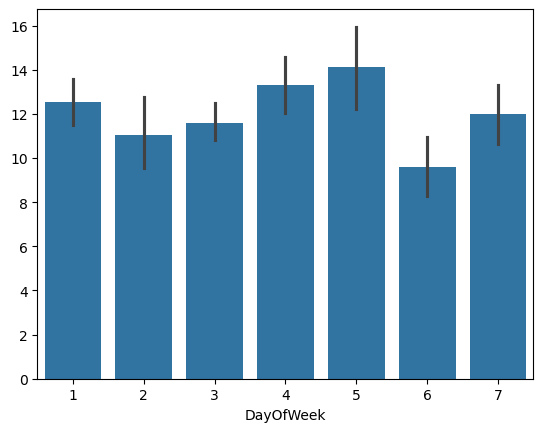

In [67]:
import matplotlib as plt
import seaborn as sns 

sns.barplot(data = avg_dailydelay_all)
